In [20]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

params = {'figure.figsize': (11, 6),
          'font.size': 15,
          'axes.grid': True,
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'axes.axisbelow': True}

plt.rcParams.update(params)

In [38]:
c = 299792458
sample_rate=44100

In [44]:
def load(file):
    wavelengths, absorbances = np.loadtxt(f'{file}.txt', skiprows=1).T
    frequencies = c / wavelengths * 1e9
    return frequencies, absorbances

def plot(frequencies, absorbances):
    plt.plot(frequencies, absorbances)
    plt.xlabel('Frecuencia [hz]')
    plt.ylabel('Absorbancia')

def map(frequencies):
    f_min = 100
    f_max = 1000
    return f_min + (f_max - f_min) / (7.5e14 - 4e14) * (frequencies- 4e14)

def sound(audible_frequencies, absorbances, duration=10):
    t = np.linspace(0, duration, duration*sample_rate)
    waveform = 0
    for f, A in zip(audible_frequencies, absorbances):
        waveform += A * np.sin(2*np.pi*f*t)
    return waveform / np.max(waveform)

def play(waveform):
    return Audio(waveform, rate=sample_rate)

def save(waveform, file):
    tot = waveform.astype(np.float32)
    wavfile.write(f'{file}.wav', sample_rate, tot)

def load_plot_play(file):
    frequencies, absorbances = load(file)
    plot(frequencies, absorbances)
    audible_frequencies = map(frequencies)
    waveform = sound(audible_frequencies, absorbances)
    save(waveform, file)
    return play(waveform)

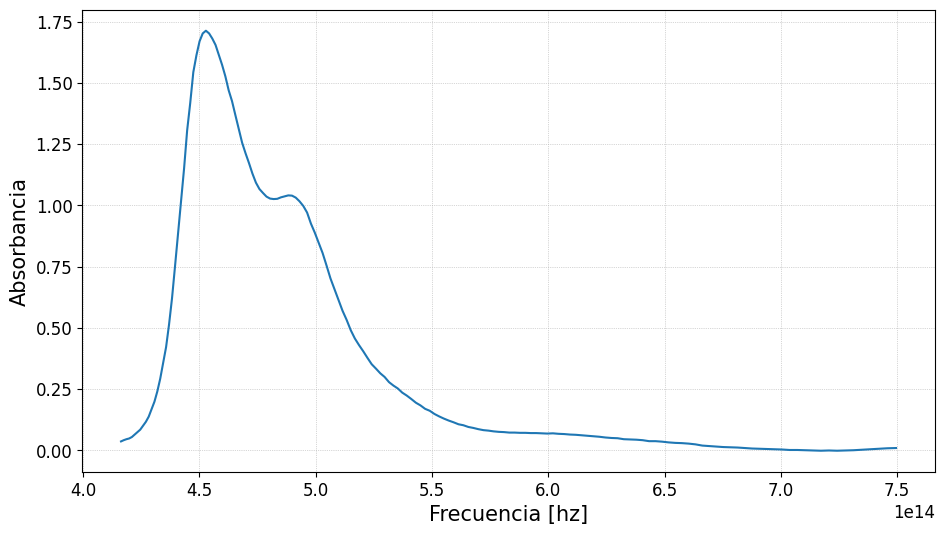

In [45]:
load_plot_play('azul_de_metileno')

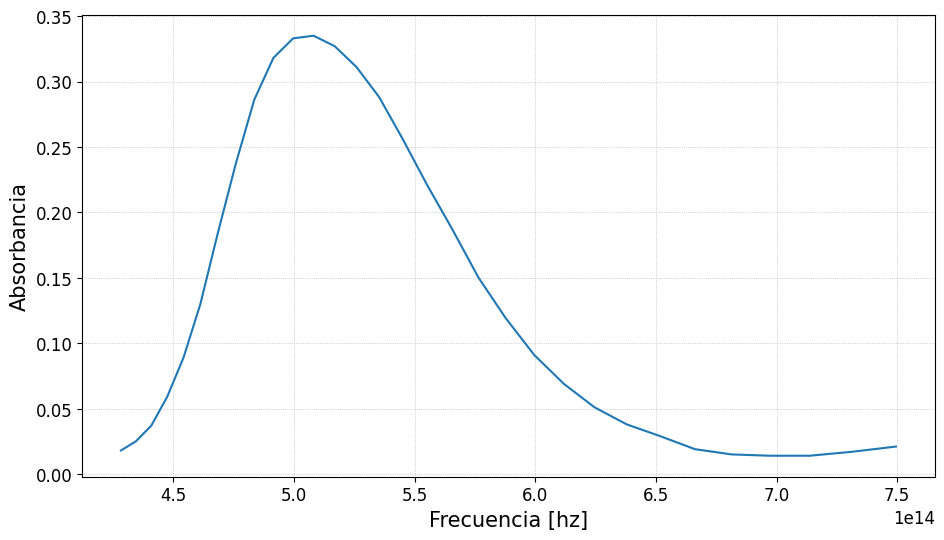

In [46]:
load_plot_play('azul_de_metilo')